# San Francisco Bike Share

Data analysis using Google Cloud Platform. 

In this notebook we examine the question:

### What are the 5 most popular trips that you would call "commuter trips"?
The five most popular commuter trips are the trips around peak usage times (7 - 10AM,  4 - 7PM, Monday - Friday) by subscribers (shown in the table in Question 6). In order to answer this question we first found the most popular times for go bike usage. We also determined whether subscribers or customers make more trips. Subscribers use the bikes more and it is likely that a commuter trip is made on a regular basis so it is more likely that a commuter trip is made by a subscriber. 

#### Findings
1. PM trips are more popular than AM trips
2. The busiest times of the day are 7 - 10 AM and 4 - 7 PM Monday through Friday(weekdays) (commuter hours)
3. During these times the 5 most popular trips involved a caltrain stop and other public transportation. Most users appear to be leaving or heading to some form of public transportation with the bikes.
4. December is the least usage of any month, indicating that when people go on holiday, ride usage falls. Commuters to the city are far fewer during this month. People who work in San Franscisco are big users and use the bikes for getting to and from work. 
5. Usage outside of these hours (7 - 10 AM and 4 - 7 PM) looks to be much lower and there doesn't appear to be much difference in usage between weekdays and weekends during during non-commuter hours.


#### Recommendations for offers
1. Advertise the Ford GoBike service in public transportation to encourage more people who are in the train or public transport to use it. 
2. Make it possible to pay for the Ford GoBike using the same form of payment as the public transport, making it easier for people to take or pay for the bike on an ad hoc basis. 
2. Provide incentive for people to use the bikes in December, for example reducing the price for customers during the holiday season. 
3. Make rides free at low usage times, weekends and early morning/late evening. This increases ridership and awareness of the Ford GoBikes and might cause more people to use it at other times.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Question 1: What is the frequency of the kinds of users' bike use? i.e. do Customers or Subscribers use the service more?**

Answer: The number of Subscriber trips are 846839 and Customer trips are 136809. Subscriber's use it more.

In [2]:
#SQL query:

!bq query --use_legacy_sql=false --format=csv ' \
        SELECT subscriber_type, count(subscriber_type) as number_of_trips \
        FROM \
           `bigquery-public-data.san_francisco.bikeshare_trips` \
        group by subscriber_type' > kinds_user.csv

Waiting on bqjob_r137b429ec52dcaec_00000168d070a5ce_1 ... (0s) Current status: DONE   

In [3]:
subscriber_type = pd.read_csv('kinds_user.csv')
subscriber_type

,subscriber_type,number_of_trips
0,Customer,136809
1,Subscriber,846839


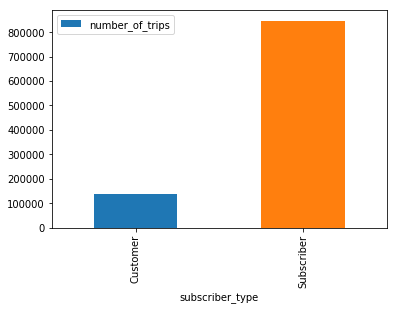

In [18]:
subscriber_type.plot.bar(x='subscriber_type', y='number_of_trips')

**Question 2: What are the top 5 routes (pair of stations) are most popular for subscriber_type Customer?**

Answer: See table of results below. Note that the Ferry building and Embarcadero appear to be popular stations.

In [5]:
#SQL query:

!bq query --use_legacy_sql=false --format=csv '\
SELECT start_station_name, end_station_name, COUNT(*) AS number_of_trips \
FROM `bigquery-public-data.san_francisco.bikeshare_trips` \
group by subscriber_type, start_station_name, end_station_name \
having subscriber_type = "Customer" \
order by number_of_trips desc limit 5'> result.csv

Waiting on bqjob_r7be1e7ed6cb83a7f_00000168d070ac74_1 ... (0s) Current status: DONE   

In [6]:
top_customer_route = pd.read_csv('result.csv')
top_customer_route

,start_station_name,end_station_name,number_of_trips
0,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,3667
1,Embarcadero at Sansome,Embarcadero at Sansome,2545
2,Harry Bridges Plaza (Ferry Building),Harry Bridges Plaza (Ferry Building),2004
3,Embarcadero at Sansome,Harry Bridges Plaza (Ferry Building),1638
4,Embarcadero at Vallejo,Embarcadero at Sansome,1345


**Question 3: What are the top 5 routes (pair of stations) are most popular for subscriber_type Subscriber?**

 Answer: Answer in table below. There appear to be some more public transport locations here (caltrain)

In [7]:
#SQL query:

!bq query --use_legacy_sql=false --format=csv '\
SELECT subscriber_type, start_station_name, end_station_name, count(*) AS number_of_trips \
  FROM `bigquery-public-data.san_francisco.bikeshare_trips` \
  where subscriber_type = "Subscriber" \
  group by subscriber_type, start_station_name, end_station_name \
  order by number_of_trips desc \
  limit 5' > top_subscriber.csv

Waiting on bqjob_r6e5c45d284acc007_00000168d070b222_1 ... (0s) Current status: DONE   

In [8]:
top_subscriber_route = pd.read_csv('top_subscriber.csv')
top_subscriber_route

,subscriber_type,start_station_name,end_station_name,number_of_trips
0,Subscriber,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,8305
1,Subscriber,2nd at Townsend,Harry Bridges Plaza (Ferry Building),6931
2,Subscriber,Townsend at 7th,San Francisco Caltrain 2 (330 Townsend),6641
3,Subscriber,Harry Bridges Plaza (Ferry Building),2nd at Townsend,6332
4,Subscriber,Embarcadero at Sansome,Steuart at Market,6200


**Question 4: For which month do we see lowest number of bike rides?**

Answer: Least popular month is **December**.

In [9]:
!bq query --use_legacy_sql=false --format=csv '\
  SELECT extract(month from start_date) as month, COUNT(*) AS number_of_trips \
  FROM `bigquery-public-data.san_francisco.bikeshare_trips` \
  group by month \
  order by number_of_trips asc \
  limit 1' > bike_usuage.csv

Waiting on bqjob_r3b71e76839d6b9c3_00000168d070b78a_1 ... (0s) Current status: DONE   

In [10]:
lowest_bikerides = pd.read_csv('bike_usuage.csv')
lowest_bikerides

,month,number_of_trips
0,12,57961


**Question 5: what are the most popular hour-day combination for bike usage?**

Answer: Most popular hours are 8 AM and 5 PM, Monday through Friday.

In [11]:
#SQL query:

!bq query --use_legacy_sql=false --format=csv '\
SELECT extract(hour from start_date) as time, extract(dayofweek from start_date) as day, COUNT(*) AS number_of_trips \
FROM `bigquery-public-data.san_francisco.bikeshare_trips` \
group by day, time \
order by number_of_trips desc \
limit 10' > time.csv

Waiting on bqjob_r2a7c0a76bef9e1bc_00000168d070bd0c_1 ... (0s) Current status: DONE   

In [12]:
time_bike = pd.read_csv('time.csv')
time_bike

,time,day,number_of_trips
0,8,3,28138
1,8,4,27043
2,8,5,26014
3,17,3,25458
4,8,2,25443
5,17,2,24706
6,17,4,24650
7,17,5,23312
8,8,6,22361
9,17,6,20206


Pulling all data for day-time combinations and producing a heatmap of hourly usage to get a sense of how much variation in usage there is outside of peak times. Also to determine whether other times should be considered commuter hours.

In [13]:
!bq query --max_rows=1000 --use_legacy_sql=false --format=csv '\
SELECT extract(hour from start_date) as time, extract(dayofweek from start_date) as day, COUNT(*) AS count \
FROM `bigquery-public-data.san_francisco.bikeshare_trips` \
group by day, time \
order by count desc' > time_all.csv

Waiting on bqjob_r4ff487bd121f9cf8_00000168d070c283_1 ... (0s) Current status: DONE   

In [14]:
time_all_bike = pd.read_csv('time_all.csv')

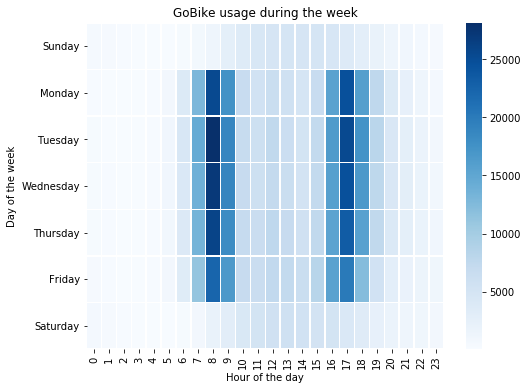

In [15]:
encode_day = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
time_all_bike['dayname'] = time_all_bike['day'].apply(lambda x: encode_day[x-1])
time_all_bike.sort_values(['day', 'time'], inplace = True)
grid = time_all_bike.pivot_table(index = 'day', columns='time')
grid.columns = range(24)
grid.index = [encode_day[i-1] for i in list(grid.index)]
p = sns.heatmap(grid, linewidths=.5, cmap='Blues')
p.set_xlabel('Hour of the day')
p.set_ylabel('Day of the week')
p.set_title("GoBike usage during the week")
fig = p.figure
fig.set_size_inches(8,6)

Chart shows the heatmap of rides by day and hour of the day. It shows that commuters use the service very heavily between 7 - 10 AM and 4 - 7 PM, Monday to Friday. 

**Question 6. What are the most popular trips around peak usage times (7 - 10AM,  4 - 7PM, Monday - Friday) by subscribers?**

Answer: Table below shows the results. 

In [16]:
!bq query --use_legacy_sql=false --format=csv ' \
SELECT start_station_name, end_station_name, COUNT(*) AS number_of_trips \
  FROM `bigquery-public-data.san_francisco.bikeshare_trips` \
  where subscriber_type = "Subscriber" \
  and extract(hour from start_date) in (7,8,9, 16,17, 18) \
  and extract(dayofweek from start_date) in (2,3,4,5,6) \
  group by start_station_name, end_station_name \
  order by number_of_trips desc \
  limit 5'> popular_trips.csv

Waiting on bqjob_r184889749f23f3d_00000168d070c9a5_1 ... (0s) Current status: DONE   

In [17]:
commuter_trips = pd.read_csv('popular_trips.csv')
commuter_trips

,start_station_name,end_station_name,number_of_trips
0,2nd at Townsend,Harry Bridges Plaza (Ferry Building),5034
1,Harry Bridges Plaza (Ferry Building),2nd at Townsend,4973
2,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,4958
3,Embarcadero at Sansome,Steuart at Market,4689
4,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),4686
